In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("tmp/data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [82]:
# parameter
learning_rate = 0.01
epochs = 30000
batch_size = 256
disp_step = 1000

# layer parameter
n_input = 28 * 28
n_output = 28 * 28
n_hidden_1 = 256
n_hidden_2 = 128

In [83]:
# weight 
weights = {
    "we1" : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    "we2" : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    "wd1" : tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    "wd2" : tf.Variable(tf.random_normal([n_hidden_1, n_output]))
}

biases = {
    "be1" : tf.Variable(tf.random_normal([n_hidden_1])),
    "be2" : tf.Variable(tf.random_normal([n_hidden_2])),
    "bd1" : tf.Variable(tf.random_normal([n_hidden_1])),
    "bd2" : tf.Variable(tf.random_normal([n_output])),
}

In [84]:
# input, output
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_input])

In [94]:
# model
def Encoder(x):
    x = tf.reshape(x, [-1, n_input])
    layer1 = tf.add(tf.matmul(x, weights["we1"]), biases["be1"])
    layer1 = tf.nn.relu(layer1) 
    
    layer2 = tf.add(tf.matmul(layer1, weights["we2"]), biases["be2"])
    layer2 = tf.nn.relu(layer2)
    
    return layer2

def Decoder(x):
    layer1 = tf.add(tf.matmul(x, weights["wd1"]), biases["bd1"])
    layer1 = tf.nn.relu(layer1) 
    
    layer2 = tf.add(tf.matmul(layer1, weights["wd2"]), biases["bd2"])
    
    return layer2    

In [95]:
en_op = Encoder(X)
de_op = Decoder(en_op)

In [96]:
# loss
loss_op = tf.reduce_mean(tf.pow(Y-de_op, 2))

In [103]:
# optimizer 
optimizer = tf.train.AdamOptimizer(0.01)
train_op =  optimizer.minimize(loss_op)

In [104]:
# init 
init = tf.global_variables_initializer()

##### Run

In [105]:
sess = tf.Session()

sess.run(init)

for epoch in range(epochs):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    loss, _ = sess.run([loss_op, train_op], feed_dict = {X : batch_x, Y : batch_x})
    
    if epoch % disp_step == 0:
        print("epoch {} Loss : {}".format(epoch, loss))

epoch 0 Loss : 92907144.0
epoch 1000 Loss : 27.40517807006836
epoch 2000 Loss : 6.278326034545898
epoch 3000 Loss : 1.838364839553833
epoch 4000 Loss : 0.5773530006408691
epoch 5000 Loss : 0.24482490122318268
epoch 6000 Loss : 0.11900681257247925
epoch 7000 Loss : 0.07667896896600723
epoch 8000 Loss : 0.06717491149902344
epoch 9000 Loss : 0.0689932256937027
epoch 10000 Loss : 0.06599108129739761
epoch 11000 Loss : 0.06891076266765594
epoch 12000 Loss : 0.06707340478897095
epoch 13000 Loss : 0.06678315252065659
epoch 14000 Loss : 0.06595253199338913
epoch 15000 Loss : 0.06749588251113892
epoch 16000 Loss : 0.06732238829135895
epoch 17000 Loss : 0.06916064769029617
epoch 18000 Loss : 0.06873191148042679
epoch 19000 Loss : 0.06678920239210129
epoch 20000 Loss : 0.06915489584207535
epoch 21000 Loss : 0.06835997104644775
epoch 22000 Loss : 0.06750450283288956
epoch 23000 Loss : 0.06847132742404938
epoch 24000 Loss : 0.06697505712509155
epoch 25000 Loss : 0.06913042813539505
epoch 26000 Loss

##### Test

In [106]:
import matplotlib.pyplot as plt
import numpy as np

Original Images


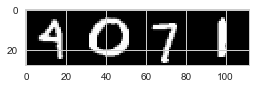

Reconstructed Images


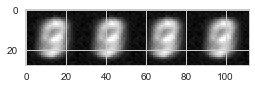

In [112]:
n = 4
img_origin = np.empty((28, 28 * n))
img_output = np.empty((28, 28 * n))

batch_x, _ = mnist.test.next_batch(n)
vector = sess.run(en_op, feed_dict = {X : batch_x})
output = sess.run(de_op, feed_dict = {X : batch_x})

for i in range(n):
    img_origin[:, i * 28:(i + 1) * 28] = batch_x[i].reshape(28, 28)
    img_output[:, i * 28:(i + 1) * 28] = output[i].reshape(28, 28)
    
print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(img_origin, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(img_output, origin="upper", cmap="gray")
plt.show()

In [111]:
vector[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [109]:
batch_x[0].reshape(28, 28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    